# CMSE 381 Honors Project

#### CMSE 381 Honors Project
### &#9989; Section_002
#### &#9989; 04/30/2025

# How Does Image Augmentation (eg., flipping, brightness adjustment etc)  Affect Crack Detection? 

## Introduction (Background & Motivation)

In real-world infrastructure inspection, cracks on concrete surfaces can appear in diverse orientations, under varying lighting conditions, and on surfaces with different textures. These inconsistencies present a challenge for deep learning models trained to detect cracks, as they may struggle to generalize beyond the specific patterns seen during training. To address this, image augmentation techniques—such as flipping, rotation, and brightness adjustment—are commonly applied. These methods artificially increase dataset diversity by simulating realistic variations, helping models learn more generalized features.

This project aims to evaluate the impact of such augmentation techniques on the accuracy and robustness of crack detection models. By comparing performance before and after applying augmentation, we seek to understand how augmentation influences model effectiveness, and explore potential improvements that can further enhance performance after augmentation.



# Methodology 

The overall methodology was to divide the dataset into augmented and unaugmented image models for both regression and classification 
and then see if it affects the crack detection accruacy, precision , recall etc in each of the two models. Finally use the accuracies to 
see which models used out of the four work best for deep learning for crack detection. 

## For Regression

#### Logistic Regression

Divided the whole dataset into subfolders of Walls, Pavements and Decks. Preprocessed all the images using OpenCV. 
Performed feature extraction and split the modified and combined non-cracked and cracked images into train and test datasets. Used them in Logistic Regression model. Tuned Hyperparameters for better accuracy. Printed the classification report and accuracy. 


Performed all the same tasks as above except after pre-processing and before feature extraction performed image augementation and then used all the data for train and test split and finally fitted the logreg model and got the accraucy and report. 


Compared results from before and after augmentation accuracies using matplotlib. 


#### Comaprison with Ridge Regression 

Used the same approach for preprocessing all the data but in this case used a Ridge Regression model. Tuned the hyperparameters for better accuracy. Printed the classification report, accuracy, MSE and R2 score. 


Compared the accuracies using the before and after accuracies plot using matplotlib. 

## For Classification

#### Convulational Neural Networks
To start the analysis, RGB images are collected from three categories—decks, pavements, and walls—and used PyTorch’s ImageFolder to organize them into structured datasets. Each image was resized to 128x128 pixels for consistency and reduced computational cost. To enhance model performance and generalization, we applied data augmentation using transforms.Compose, including horizontal flipping, random rotation, and color jitter. Two dataset versions were created: one with augmentation and one without, enabling performance comparison. Finally, we combined them using ConcatDataset and ensured reproducibility by setting a fixed random seed.


#### Comparison with LightGBM Classifier 

In the crack detection before image augmentation, two sets of images—cracked and non-cracked—are loaded and preprocessed by resizing them to 64×64 pixels and converting them to grayscale. These preprocessed images are then passed through a feature extraction process using the HOG method, which captures important edge and shape characteristics of the cracks. The extracted features are used to train a LightGBM classifier—a fast and efficient gradient boosting model for binary classification. The model is optimized using RandomizedSearchCV to tune hyperparameters like the number of estimators, learning rate, and maximum depth. Model performance is then evaluated using accuracy, precision, recall, and F1-score.

In the crack detection after image augmentation, the methodology remains similar in structure but introduces an image enhancement step before training. Each image undergoes three augmentation transformations: horizontal flipping, 15° rotation, and brightness adjustment. These variations are then averaged together to create a single merged-augmented image. This step simulates real-world variability in crack orientation and lighting, aiming to improve the model’s ability to generalize. The augmented images follow the same path: grayscale conversion, HOG feature extraction, model training, and evaluation. By comparing the performance of the models trained before and after augmentation, the project aims to assess the real-world effectiveness of augmentation techniques in improving crack detection.



## Imports for Regression Model

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

## Logistic Regression Model 

## Decks

## Accuracy Model for Crack Detection Before Image Augmentation

In [60]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)): # function to load in the combined data 
    images = []
    labels = [] 

    def process_folder(folder, label): 
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)   # resizing images
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

                # image append after pre-processing
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)


In [61]:
def extract_hog_features(X_images, img_shape=(128, 128)): # function created for feature extraction 
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)  # ensure consistent size
        hog_feat = hog(img_resized,
                       orientations=9,
                       pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Decks/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Decks/Non-cracked"

# Load all images
X_images, y = load_images_combined(cracked_path, non_cracked_path, size=(64,64))
X_hog = extract_hog_features(X_images, img_shape=(64, 64))
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42) 


Loaded 13620 total images before augmentation.


In [65]:
params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5) # for tuning hyperparameters in logreg
grid.fit(X_train, y_train)

model1 = grid.best_estimator_
y_pred = model1.predict(X_test)

print("Best C:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best C: {'C': 10}
Accuracy: 0.6637298091042585
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      2309
           1       0.22      0.46      0.30       415

    accuracy                           0.66      2724
   macro avg       0.55      0.58      0.54      2724
weighted avg       0.78      0.66      0.71      2724



## Accuracy Model for Crack Detection After Image Augmentation

In [98]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img): # function for image augmentation
        # Flip horizontally
        flipped = cv2.flip(img, 1)

        # Rotate 15 degrees
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))

        # Brightness adjustment
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)

        # Merge all versions into a single image by averaging
        merged = (img.astype(np.float32) +
                  flipped.astype(np.float32) +
                  rotated.astype(np.float32) +
                  brighter.astype(np.float32)) / 4.0

        merged = np.clip(merged, 0, 255).astype(np.uint8)  # ensures valid pixel values
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                merged_img = augment_and_merge(img)
                images.append(merged_img) #use the merged-augmented images in images 
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.") 
    return np.array(images), np.array(labels)


In [63]:
cracked_path = "C:/Users/Taarini/Downloads/Decks/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Decks/Non-cracked"

# 1. Load merged-augmented images
X_images, y = load_images_combined_with_merged_aug(cracked_path, non_cracked_path, size=(64, 64))

# 2. Extract HOG features
X_hog = extract_hog_features(X_images, img_shape=(64,64))

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

Loaded 13620 total merged-augmented images.


In [64]:
params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
grid.fit(X_train, y_train)

model1 = grid.best_estimator_
y_pred = model1.predict(X_test)

print("Best C:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best C: {'C': 10}
Accuracy: 0.6637298091042585
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      2309
           1       0.22      0.46      0.30       415

    accuracy                           0.66      2724
   macro avg       0.55      0.58      0.54      2724
weighted avg       0.78      0.66      0.71      2724



## Improvement Using K-fold in After Augmented LogReg Model for Decks

In [66]:
k = 5  # 5-Fold CV
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
grid.fit(X_train, y_train)

# Best model from GridSearch
model1 = grid.best_estimator_

# K-Fold Cross Validation on the best logistic regression model
cv_scores = cross_val_score(model3, X_hog, y, cv=kf, scoring='accuracy')

# Results
print(f"{k}-Fold Cross Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


5-Fold Cross Validation Accuracy Scores: [0.6681351  0.65675477 0.66997063 0.64574156 0.6732746 ]
Mean Accuracy: 0.6628
Standard Deviation: 0.0102


## Pavements

## Accuracy Model for Crack Before Image Augmentation

In [67]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = [] 

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Original image
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)


In [68]:
def extract_hog_features(X_images, img_shape=(128, 128)):
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)  # ensure consistent size
        hog_feat = hog(img_resized,
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Pavements/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Pavements/Non-cracked"

# Load all images
X_images, y = load_images_combined(cracked_path, non_cracked_path, size=(64,64))
X_hog = extract_hog_features(X_images, img_shape=(64, 64))
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)


Loaded 24334 total images before augmentation.


In [69]:
params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
grid.fit(X_train, y_train)

model2 = grid.best_estimator_
y_pred = model2.predict(X_test)

print("Best C:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best C: {'C': 10}
Accuracy: 0.6961167043353195
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      4356
           1       0.16      0.45      0.24       511

    accuracy                           0.70      4867
   macro avg       0.54      0.59      0.52      4867
weighted avg       0.84      0.70      0.75      4867



## Accuracy Model for Crack Detection After Image Augmentation

In [70]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img):
        # Flip horizontally
        flipped = cv2.flip(img, 1)

        # Rotate 15 degrees
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))

        # Brightness adjustment
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)

        # Merge all versions by averaging
        merged = (img.astype(np.float32) +
                  flipped.astype(np.float32) +
                  rotated.astype(np.float32) +
                  brighter.astype(np.float32)) / 4.0

        merged = np.clip(merged, 0, 255).astype(np.uint8)  # ensure valid pixel values
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                merged_img = augment_and_merge(img)
                images.append(merged_img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.")
    return np.array(images), np.array(labels)


In [71]:
cracked_path = "C:/Users/Taarini/Downloads/Pavements/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Pavements/Non-cracked"

# 1. Load merged-augmented images
X_images, y = load_images_combined_with_merged_aug(cracked_path, non_cracked_path, size=(64, 64))

# 2. Extract HOG features
X_hog = extract_hog_features(X_images, img_shape=(64,64))

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

# 4. Train and evaluate Logistic Regression or SVC


Loaded 24334 total merged-augmented images.


In [72]:
params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
grid.fit(X_train, y_train)

model2 = grid.best_estimator_
y_pred = model2.predict(X_test)

print("Best C:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best C: {'C': 10}
Accuracy: 0.7057735771522499
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      4356
           1       0.16      0.43      0.23       511

    accuracy                           0.71      4867
   macro avg       0.54      0.58      0.53      4867
weighted avg       0.84      0.71      0.76      4867



In [73]:
k = 5  # 5-Fold CV
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
grid.fit(X_train, y_train)

# Best model from GridSearch
model2 = grid.best_estimator_

# K-Fold Cross Validation on the best logistic regression model
cv_scores = cross_val_score(model3, X_hog, y, cv=kf, scoring='accuracy')

# Results
print(f"{k}-Fold Cross Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


5-Fold Cross Validation Accuracy Scores: [0.70659544 0.70289706 0.69817136 0.69632217 0.69605425]
Mean Accuracy: 0.7000
Standard Deviation: 0.0041


## Walls

## Accuracy Model for Crack Detection before Image Augmentation 

In [51]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = [] 

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Original image
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)


In [52]:
def extract_hog_features(X_images, img_shape=(128, 128)):
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)  # ensure consistent size
        hog_feat = hog(img_resized,
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Walls/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Walls/Non-cracked"

# Load all images
X_images, y = load_images_combined(cracked_path, non_cracked_path, size=(64,64))
X_hog = extract_hog_features(X_images, img_shape=(64, 64))
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)


Loaded 18138 total images before augmentation.


In [54]:
params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
grid.fit(X_train, y_train)

model3 = grid.best_estimator_
y_pred = model3.predict(X_test)

print("Best C:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best C: {'C': 10}
Accuracy: 0.5967475192943771
              precision    recall  f1-score   support

           0       0.82      0.63      0.71      2867
           1       0.25      0.47      0.33       761

    accuracy                           0.60      3628
   macro avg       0.53      0.55      0.52      3628
weighted avg       0.70      0.60      0.63      3628



## Accuracy Model for Crack Detection After Image Augmentation

In [55]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img):
        # Flip horizontally
        flipped = cv2.flip(img, 1)

        # Rotate 15 degrees
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))

        # Brightness adjustment
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)

        # Merge all versions by averaging
        merged = (img.astype(np.float32) +
                  flipped.astype(np.float32) +
                  rotated.astype(np.float32) +
                  brighter.astype(np.float32)) / 4.0

        merged = np.clip(merged, 0, 255).astype(np.uint8)  # ensure valid pixel values
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                merged_img = augment_and_merge(img)
                images.append(merged_img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.")
    return np.array(images), np.array(labels)


In [56]:
cracked_path = "C:/Users/Taarini/Downloads/Walls/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Walls/Non-cracked"

# 1. Load merged-augmented images
X_images, y = load_images_combined_with_merged_aug(cracked_path, non_cracked_path, size=(64, 64))

# 2. Extract HOG features
X_hog = extract_hog_features(X_images, img_shape=(64,64))

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

Loaded 18138 total merged-augmented images.


In [57]:
params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
grid.fit(X_train, y_train)

model3 = grid.best_estimator_
y_pred = model3.predict(X_test)

print("Best C:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best C: {'C': 10}
Accuracy: 0.6157662624035282
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      2867
           1       0.27      0.49      0.35       761

    accuracy                           0.62      3628
   macro avg       0.55      0.57      0.54      3628
weighted avg       0.71      0.62      0.65      3628



In [59]:
k = 5  # 5-Fold CV
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), params, cv=5)
grid.fit(X_train, y_train)

# Best model from GridSearch
model3 = grid.best_estimator_

# K-Fold Cross Validation on the best logistic regression model
cv_scores = cross_val_score(model3, X_hog, y, cv=kf, scoring='accuracy')

# Results
print(f"{k}-Fold Cross Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


5-Fold Cross Validation Accuracy Scores: [0.61521499 0.60418964 0.6022602  0.61400607 0.60270196]
Mean Accuracy: 0.6077
Standard Deviation: 0.0057


## Ridge Regression Model

### Decks 

### Crack Detection with Ridge Regression Before Augmentation

In [100]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = [] 

    def process_folder(folder, label): 
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)

def extract_hog_features(X_images, img_shape=(64, 64)):
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)
        hog_feat = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2), block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Decks/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Decks/Non-cracked"

# Load and process images
X_images, y = load_images_combined(cracked_path, non_cracked_path)
X_hog = extract_hog_features(X_images)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)


Loaded 13620 total images before augmentation.


In [103]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predict with best model
y_pred_reg = ridge_cv.predict(X_test_scaled)
y_pred_class = (y_pred_reg >= 0.5).astype(int)

# Results
print("Before Augmentation:")
print("Best alpha:", ridge_cv.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R² Score:", r2_score(y_test, y_pred_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Before Augmentation:
Best alpha: {'alpha': 100}
MSE: 0.13919110014436964
R² Score: -0.07783838067368465
Accuracy: 0.8439794419970631
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2309
           1       0.25      0.01      0.02       415

    accuracy                           0.84      2724
   macro avg       0.55      0.50      0.47      2724
weighted avg       0.76      0.84      0.78      2724



### Crack Detection with Ridge Regression After Augmentation

In [104]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img):
        flipped = cv2.flip(img, 1)
        h, w = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)
        merged = (img.astype(np.float32) + flipped + rotated + brighter) / 4.0
        merged = np.clip(merged, 0, 255).astype(np.uint8)
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                merged_img = augment_and_merge(img)
                images.append(merged_img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.") 
    return np.array(images), np.array(labels)


In [105]:
# Load and augment images
X_images_aug, y_aug = load_images_combined_with_merged_aug(cracked_path, non_cracked_path)
X_hog_aug = extract_hog_features(X_images_aug)

# Train-test split
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_hog_aug, y_aug, test_size=0.2, random_state=42)

# Standardize
X_train_aug_scaled = scaler.fit_transform(X_train_aug)
X_test_aug_scaled = scaler.transform(X_test_aug)

# Grid search
ridge_cv_aug = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv_aug.fit(X_train_aug_scaled, y_train_aug)

# Predict
y_pred_reg_aug = ridge_cv_aug.predict(X_test_aug_scaled)
y_pred_class_aug = (y_pred_reg_aug >= 0.5).astype(int)

# Results
print("\nAfter Augmentation:")
print("Best alpha:", ridge_cv_aug.best_params_)
print("MSE:", mean_squared_error(y_test_aug, y_pred_reg_aug))
print("R² Score:", r2_score(y_test_aug, y_pred_reg_aug))
print("Accuracy:", accuracy_score(y_test_aug, y_pred_class_aug))
print(classification_report(y_test_aug, y_pred_class_aug))


Loaded 13620 total merged-augmented images.

After Augmentation:
Best alpha: {'alpha': 100}
MSE: 0.13156942139468913
R² Score: -0.018819248896939644
Accuracy: 0.8469162995594713
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2309
           1       0.48      0.06      0.10       415

    accuracy                           0.85      2724
   macro avg       0.67      0.52      0.51      2724
weighted avg       0.80      0.85      0.79      2724



In [106]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize entire dataset first
scaler = StandardScaler()
X_hog_scaled = scaler.fit_transform(X_hog_aug)

# Set up KFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
mses = []
r2s = []
y_true_all = []
y_pred_all = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_hog_scaled, y_aug)):
    print(f"\nFold {fold + 1}")
    X_train, X_test = X_hog_scaled[train_idx], X_hog_scaled[test_idx]
    y_train, y_test = y_aug[train_idx], y_aug[test_idx]
    
    ridge_cv = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0]}, cv=3)
    ridge_cv.fit(X_train, y_train)
    
    y_pred_reg = ridge_cv.predict(X_test)
    y_pred_class = (y_pred_reg >= 0.5).astype(int)
    
    acc = accuracy_score(y_test, y_pred_class)
    mse = mean_squared_error(y_test, y_pred_reg)
    r2 = r2_score(y_test, y_pred_reg)

    accuracies.append(acc)
    mses.append(mse)
    r2s.append(r2)
    
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred_class)

    print(f"Best alpha: {ridge_cv.best_params_['alpha']}")
    print(f"Accuracy: {acc:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")

# Final report
print("\nAverage Accuracy:", np.mean(accuracies))
print("Average MSE:", np.mean(mses))
print("Average R²:", np.mean(r2s))
print("\nClassification Report:")
print(classification_report(y_true_all, y_pred_all))



Fold 1
Best alpha: 0.01
Accuracy: 0.8443, MSE: 0.1410, R²: -0.1136

Fold 2
Best alpha: 0.01
Accuracy: 0.8443, MSE: 0.1451, R²: -0.1467

Fold 3
Best alpha: 0.01
Accuracy: 0.8473, MSE: 0.1450, R²: -0.1459

Fold 4
Best alpha: 0.01
Accuracy: 0.8399, MSE: 0.1477, R²: -0.1673

Fold 5
Best alpha: 0.01
Accuracy: 0.8392, MSE: 0.1491, R²: -0.1779

Average Accuracy: 0.8430249632892804
Average MSE: 0.14559454048911216
Average R²: -0.15027988337708192

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     11595
           1       0.39      0.10      0.16      2025

    accuracy                           0.84     13620
   macro avg       0.63      0.54      0.54     13620
weighted avg       0.79      0.84      0.80     13620



### Pavements

### Crack Detection With Ridge Regression Before Augmentation

In [7]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = [] 

    def process_folder(folder, label): 
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)

def extract_hog_features(X_images, img_shape=(64, 64)):
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)
        hog_feat = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2), block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Pavements/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Pavements/Non-cracked"

# Load and process images
X_images, y = load_images_combined(cracked_path, non_cracked_path)
X_hog = extract_hog_features(X_images)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)


Loaded 24334 total images before augmentation.


In [8]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predict with best model
y_pred_reg = ridge_cv.predict(X_test_scaled)
y_pred_class = (y_pred_reg >= 0.5).astype(int)

# Results
print("Before Augmentation:")
print("Best alpha:", ridge_cv.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R² Score:", r2_score(y_test, y_pred_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Before Augmentation:
Best alpha: {'alpha': 100}
MSE: 0.09486249504803586
R² Score: -0.009504977035033502
Accuracy: 0.894390795151017
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      4356
           1       0.36      0.01      0.02       511

    accuracy                           0.89      4867
   macro avg       0.63      0.50      0.48      4867
weighted avg       0.84      0.89      0.85      4867



### Crack Detection With Ridge Regression After Augmentation

In [107]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img):
        flipped = cv2.flip(img, 1)
        h, w = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)
        merged = (img.astype(np.float32) + flipped + rotated + brighter) / 4.0
        merged = np.clip(merged, 0, 255).astype(np.uint8)
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                merged_img = augment_and_merge(img)
                images.append(merged_img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.") 
    return np.array(images), np.array(labels)


In [108]:
# Load and augment images
X_images_aug, y_aug = load_images_combined_with_merged_aug(cracked_path, non_cracked_path)
X_hog_aug = extract_hog_features(X_images_aug)

# Train-test split
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_hog_aug, y_aug, test_size=0.2, random_state=42)

# Standardize
X_train_aug_scaled = scaler.fit_transform(X_train_aug)
X_test_aug_scaled = scaler.transform(X_test_aug)

# Grid search
ridge_cv_aug = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv_aug.fit(X_train_aug_scaled, y_train_aug)

# Predict
y_pred_reg_aug = ridge_cv_aug.predict(X_test_aug_scaled)
y_pred_class_aug = (y_pred_reg_aug >= 0.5).astype(int)

# Results
print("\nAfter Augmentation:")
print("Best alpha:", ridge_cv_aug.best_params_)
print("MSE:", mean_squared_error(y_test_aug, y_pred_reg_aug))
print("R² Score:", r2_score(y_test_aug, y_pred_reg_aug))
print("Accuracy:", accuracy_score(y_test_aug, y_pred_class_aug))
print(classification_report(y_test_aug, y_pred_class_aug))


Loaded 13620 total merged-augmented images.

After Augmentation:
Best alpha: {'alpha': 100}
MSE: 0.13156942139468913
R² Score: -0.018819248896939644
Accuracy: 0.8469162995594713
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2309
           1       0.48      0.06      0.10       415

    accuracy                           0.85      2724
   macro avg       0.67      0.52      0.51      2724
weighted avg       0.80      0.85      0.79      2724



In [109]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize entire dataset first
scaler = StandardScaler()
X_hog_scaled = scaler.fit_transform(X_hog_aug)

# Set up KFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
mses = []
r2s = []
y_true_all = []
y_pred_all = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_hog_scaled, y_aug)):
    print(f"\nFold {fold + 1}")
    X_train, X_test = X_hog_scaled[train_idx], X_hog_scaled[test_idx]
    y_train, y_test = y_aug[train_idx], y_aug[test_idx]
    
    ridge_cv = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0]}, cv=3)
    ridge_cv.fit(X_train, y_train)
    
    y_pred_reg = ridge_cv.predict(X_test)
    y_pred_class = (y_pred_reg >= 0.5).astype(int)
    
    acc = accuracy_score(y_test, y_pred_class)
    mse = mean_squared_error(y_test, y_pred_reg)
    r2 = r2_score(y_test, y_pred_reg)

    accuracies.append(acc)
    mses.append(mse)
    r2s.append(r2)
    
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred_class)

    print(f"Best alpha: {ridge_cv.best_params_['alpha']}")
    print(f"Accuracy: {acc:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")

# Final report
print("\nAverage Accuracy:", np.mean(accuracies))
print("Average MSE:", np.mean(mses))
print("Average R²:", np.mean(r2s))
print("\nClassification Report:")
print(classification_report(y_true_all, y_pred_all))



Fold 1
Best alpha: 0.01
Accuracy: 0.8443, MSE: 0.1410, R²: -0.1136

Fold 2
Best alpha: 0.01
Accuracy: 0.8443, MSE: 0.1451, R²: -0.1467

Fold 3
Best alpha: 0.01
Accuracy: 0.8473, MSE: 0.1450, R²: -0.1459

Fold 4
Best alpha: 0.01
Accuracy: 0.8399, MSE: 0.1477, R²: -0.1673

Fold 5
Best alpha: 0.01
Accuracy: 0.8392, MSE: 0.1491, R²: -0.1779

Average Accuracy: 0.8430249632892804
Average MSE: 0.14559454048911216
Average R²: -0.15027988337708192

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     11595
           1       0.39      0.10      0.16      2025

    accuracy                           0.84     13620
   macro avg       0.63      0.54      0.54     13620
weighted avg       0.79      0.84      0.80     13620



### Walls 

### Crack Detection with Ridge Regression Before Augmentation

In [11]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = [] 

    def process_folder(folder, label): 
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)

def extract_hog_features(X_images, img_shape=(64, 64)):
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)
        hog_feat = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2), block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Walls/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Walls/Non-cracked"

# Load and process images
X_images, y = load_images_combined(cracked_path, non_cracked_path)
X_hog = extract_hog_features(X_images)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)


Loaded 18138 total images before augmentation.


In [12]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predict with best model
y_pred_reg = ridge_cv.predict(X_test_scaled)
y_pred_class = (y_pred_reg >= 0.5).astype(int)

# Results
print("Before Augmentation:")
print("Best alpha:", ridge_cv.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R² Score:", r2_score(y_test, y_pred_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Before Augmentation:
Best alpha: {'alpha': 100}
MSE: 0.17423974508876833
R² Score: -0.05116147127124826
Accuracy: 0.7830760749724366
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      2867
           1       0.35      0.04      0.07       761

    accuracy                           0.78      3628
   macro avg       0.57      0.51      0.47      3628
weighted avg       0.70      0.78      0.71      3628



### Crack Detection with Ridge Regression After Augmentation 

In [110]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img):
        flipped = cv2.flip(img, 1)
        h, w = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)
        merged = (img.astype(np.float32) + flipped + rotated + brighter) / 4.0
        merged = np.clip(merged, 0, 255).astype(np.uint8)
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                merged_img = augment_and_merge(img)
                images.append(merged_img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.") 
    return np.array(images), np.array(labels)


In [111]:
# Load and augment images
X_images_aug, y_aug = load_images_combined_with_merged_aug(cracked_path, non_cracked_path)
X_hog_aug = extract_hog_features(X_images_aug)

# Train-test split
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_hog_aug, y_aug, test_size=0.2, random_state=42)

# Standardize
X_train_aug_scaled = scaler.fit_transform(X_train_aug)
X_test_aug_scaled = scaler.transform(X_test_aug)

# Grid search
ridge_cv_aug = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv_aug.fit(X_train_aug_scaled, y_train_aug)

# Predict
y_pred_reg_aug = ridge_cv_aug.predict(X_test_aug_scaled)
y_pred_class_aug = (y_pred_reg_aug >= 0.5).astype(int)

# Results
print("\nAfter Augmentation:")
print("Best alpha:", ridge_cv_aug.best_params_)
print("MSE:", mean_squared_error(y_test_aug, y_pred_reg_aug))
print("R² Score:", r2_score(y_test_aug, y_pred_reg_aug))
print("Accuracy:", accuracy_score(y_test_aug, y_pred_class_aug))
print(classification_report(y_test_aug, y_pred_class_aug))


Loaded 13620 total merged-augmented images.

After Augmentation:
Best alpha: {'alpha': 100}
MSE: 0.13156942139468913
R² Score: -0.018819248896939644
Accuracy: 0.8469162995594713
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2309
           1       0.48      0.06      0.10       415

    accuracy                           0.85      2724
   macro avg       0.67      0.52      0.51      2724
weighted avg       0.80      0.85      0.79      2724



In [112]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize entire dataset first
scaler = StandardScaler()
X_hog_scaled = scaler.fit_transform(X_hog_aug)

# Set up KFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
mses = []
r2s = []
y_true_all = []
y_pred_all = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_hog_scaled, y_aug)):
    print(f"\nFold {fold + 1}")
    X_train, X_test = X_hog_scaled[train_idx], X_hog_scaled[test_idx]
    y_train, y_test = y_aug[train_idx], y_aug[test_idx]
    
    ridge_cv = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0]}, cv=3)
    ridge_cv.fit(X_train, y_train)
    
    y_pred_reg = ridge_cv.predict(X_test)
    y_pred_class = (y_pred_reg >= 0.5).astype(int)
    
    acc = accuracy_score(y_test, y_pred_class)
    mse = mean_squared_error(y_test, y_pred_reg)
    r2 = r2_score(y_test, y_pred_reg)

    accuracies.append(acc)
    mses.append(mse)
    r2s.append(r2)
    
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred_class)

    print(f"Best alpha: {ridge_cv.best_params_['alpha']}")
    print(f"Accuracy: {acc:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")

# Final report
print("\nAverage Accuracy:", np.mean(accuracies))
print("Average MSE:", np.mean(mses))
print("Average R²:", np.mean(r2s))
print("\nClassification Report:")
print(classification_report(y_true_all, y_pred_all))



Fold 1
Best alpha: 0.01
Accuracy: 0.8443, MSE: 0.1410, R²: -0.1136

Fold 2
Best alpha: 0.01
Accuracy: 0.8443, MSE: 0.1451, R²: -0.1467

Fold 3
Best alpha: 0.01
Accuracy: 0.8473, MSE: 0.1450, R²: -0.1459

Fold 4
Best alpha: 0.01
Accuracy: 0.8399, MSE: 0.1477, R²: -0.1673

Fold 5
Best alpha: 0.01
Accuracy: 0.8392, MSE: 0.1491, R²: -0.1779

Average Accuracy: 0.8430249632892804
Average MSE: 0.14559454048911216
Average R²: -0.15027988337708192

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     11595
           1       0.39      0.10      0.16      2025

    accuracy                           0.84     13620
   macro avg       0.63      0.54      0.54     13620
weighted avg       0.79      0.84      0.80     13620



## For Classfication

## Imports for CNN (Convulational Neural Network) Classification

In [4]:
import os
import random
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader, ConcatDataset, Subset
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim


In [5]:
random.seed(42)
torch.manual_seed(42)

# Define transformations
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

no_aug_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load original (no augmentation) datasets
decks_no_aug = datasets.ImageFolder("C:/Users/Taarini/Downloads/Decks", transform=no_aug_transforms)
pavements_no_aug = datasets.ImageFolder("C:/Users/Taarini/Downloads/Pavements", transform=no_aug_transforms)
walls_no_aug = datasets.ImageFolder("C:/Users/Taarini/Downloads/Walls", transform=no_aug_transforms)

original_dataset = ConcatDataset([decks_no_aug, pavements_no_aug, walls_no_aug])

# Load datasets with augmentation
decks = datasets.ImageFolder("C:/Users/Taarini/Downloads/Decks", transform=train_transforms)
pavements = datasets.ImageFolder("C:/Users/Taarini/Downloads/Pavements", transform=train_transforms)
walls = datasets.ImageFolder("C:/Users/Taarini/Downloads/Walls", transform=train_transforms)

full_dataset = ConcatDataset([decks, pavements, walls])

In [6]:
# For the augmented dataset
subset_size = 200
subset_indices = random.sample(range(len(full_dataset)), subset_size)
small_augmented_dataset = Subset(full_dataset, subset_indices)

# For the no-augmentation dataset
no_aug_subset_indices = random.sample(range(len(original_dataset)), subset_size)
small_no_aug_dataset = Subset(original_dataset, no_aug_subset_indices)

# Define validation transforms (you can use the same transform as for training or different if needed)
val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Split into train (70%), validation (15%), and test (15%) for augmented data
train_size = int(0.7 * len(small_augmented_dataset))
val_size = int(0.15 * len(small_augmented_dataset))
test_size = len(small_augmented_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(small_augmented_dataset, [train_size, val_size, test_size])

# Apply validation transforms to val_dataset
val_dataset.dataset.transform = val_transforms

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Split into train (70%), validation (15%), and test (15%) for no-augmented data
no_aug_train_size = int(0.7 * len(small_no_aug_dataset))
no_aug_val_size = int(0.15 * len(small_no_aug_dataset))
no_aug_test_size = len(small_no_aug_dataset) - no_aug_train_size - no_aug_val_size

no_aug_train_dataset, no_aug_val_dataset, no_aug_test_dataset = random_split(small_no_aug_dataset, [no_aug_train_size, no_aug_val_size, no_aug_test_size])

# Apply validation transforms to no_aug_val_dataset
no_aug_val_dataset.dataset.transform = val_transforms

no_aug_train_loader = DataLoader(no_aug_train_dataset, batch_size=32, shuffle=True)
no_aug_val_loader = DataLoader(no_aug_val_dataset, batch_size=32, shuffle=False)
no_aug_test_loader = DataLoader(no_aug_test_dataset, batch_size=32, shuffle=False)



In [48]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create model for each dataset
num_classes = 2  # adjust based on your data
model_decks = SimpleCNN(num_classes).to(device)
model_pavements = SimpleCNN(num_classes).to(device)
model_walls = SimpleCNN(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_decks = optim.Adam(model_decks.parameters(), lr=0.001)
optimizer_pavements = optim.Adam(model_pavements.parameters(), lr=0.001)
optimizer_walls = optim.Adam(model_walls.parameters(), lr=0.001)


### Light GBM Classifier

### Decks

### Crack Detection Before Image Augmentation 

In [81]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)): # function to load in the combined data 
    images = []
    labels = [] 

    def process_folder(folder, label): 
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)   # resizing images
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

                # image append after pre-processing
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)


In [82]:
def extract_hog_features(X_images, img_shape=(128, 128)): # function created for feature extraction 
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)  # ensure consistent size
        hog_feat = hog(img_resized,
                       orientations=9,
                       pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Decks/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Decks/Non-cracked"

# Load all images
X_images, y = load_images_combined(cracked_path, non_cracked_path, size=(64,64))
X_hog = extract_hog_features(X_images, img_shape=(64, 64))
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42) 


Loaded 13620 total images before augmentation.


In [83]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) # to ignore any warnings for using a numpy array of x_Train & y_Train 
import lightgbm as lgb  # new library for classification model called LGBM Classifier 

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]} ## for hyperparameter tuning
model4 = RandomizedSearchCV(lgb.LGBMClassifier(class_weight='balanced'), params, n_iter=4, cv=3).fit(X_train, y_train)
y_pred = model4.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1074, number of negative: 6190
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.207386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1073, number of negative: 6191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.226749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1073, number of negative: 6191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.186637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Info] Number of positive: 1073, number of negative: 6191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.191867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Info] Number of positive: 1073, number of negative: 6191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.176359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### Crack Detection After Image Augmentation

In [84]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img): # function for image augmentation
        # Flip horizontally
        flipped = cv2.flip(img, 1)

        # Rotate 15 degrees
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))

        # Brightness adjustment
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)

        # Merge all versions into a single image by averaging
        merged = (img.astype(np.float32) +
                  flipped.astype(np.float32) +
                  rotated.astype(np.float32) +
                  brighter.astype(np.float32)) / 4.0

        merged = np.clip(merged, 0, 255).astype(np.uint8)  # ensures valid pixel values
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                merged_img = augment_and_merge(img)
                images.append(merged_img) #use the merged-augmented images in images 
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.") 
    return np.array(images), np.array(labels)


In [85]:
cracked_path = "C:/Users/Taarini/Downloads/Decks/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Decks/Non-cracked"

# 1. Load merged-augmented images
X_images, y = load_images_combined_with_merged_aug(cracked_path, non_cracked_path, size=(64, 64))

# 2. Extract HOG features
X_hog = extract_hog_features(X_images, img_shape=(64,64))

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

Loaded 13620 total merged-augmented images.


In [86]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) # to ignore any warnings for using a numpy array of x_Train & y_Train 
import lightgbm as lgb  # new library for classification model called LGBM Classifier 

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]} ## for hyperparameter tuning
model4 = RandomizedSearchCV(lgb.LGBMClassifier(class_weight='balanced'), params, n_iter=4, cv=3).fit(X_train, y_train)
y_pred = model4.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1074, number of negative: 6190
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.177884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Info] Number of positive: 1073, number of negative: 6191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.180324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Info] Number of positive: 1073, number of negative: 6191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.193958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Info] Number of positive: 1074, number of negative: 6190
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.189643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Info] Number of positive: 1073, number of negative: 6191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.189921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 7264, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1610, number of negative: 9286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.275699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      2309
           1       0.29      0.54      0.38       415

    accuracy                           0.73      2724
   macro avg       0.60      0.65      0.60      2724
weighted avg       0.81      0.73      0.76      2724



### Improvement on Model Using K-fold 

In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

warnings.filterwarnings('ignore', category=UserWarning) ## to ignore any warnings related to the use of numpy array for x and y_train

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(0, 10000))
accuracies = []
all_y_true = []
all_y_pred = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f"\nFold {fold + 1}")

    X_fold_train, X_fold_test = X_train[train_idx], X_train[test_idx]
    y_fold_train, y_fold_test = y_train[train_idx], y_train[test_idx]

    model4 = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, class_weight='balanced')
    model4.fit(X_fold_train, y_fold_train)
    
    y_pred_fold = model4.predict(X_fold_test)
    
    acc = accuracy_score(y_fold_test, y_pred_fold)
    accuracies.append(acc)
    
    all_y_true.extend(y_fold_test)
    all_y_pred.extend(y_pred_fold)

    print(f"Fold Accuracy: {acc:.4f}")

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print("\nFull Classification Report (across all folds):")
print(classification_report(all_y_true, all_y_pred))



Fold 1
[LightGBM] [Info] Number of positive: 1288, number of negative: 7428
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.221940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 8716, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Fold Accuracy: 0.8532

Fold 2
[LightGBM] [Info] Number of positive: 1288, number of negative: 7429
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.208553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 8717, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start trai

### Pavements

### Crack Detection Before Image Augmentation

In [88]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)): # function to load in the combined data 
    images = []
    labels = [] 

    def process_folder(folder, label): 
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)   # resizing images
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

                # image append after pre-processing
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)


def extract_hog_features(X_images, img_shape=(128, 128)): # function created for feature extraction 
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)  # ensure consistent size
        hog_feat = hog(img_resized,
                       orientations=9,
                       pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Pavements/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Pavements/Non-cracked"

# Load all images
X_images, y = load_images_combined(cracked_path, non_cracked_path, size=(64,64))
X_hog = extract_hog_features(X_images, img_shape=(64, 64))
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42) 



Loaded 24334 total images before augmentation.


In [89]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) # to ignore any warnings for using a numpy array of x_Train & y_Train 
import lightgbm as lgb  # new library for classification model called LGBM Classifier 

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]} ## for hyperparameter tuning
model5 = RandomizedSearchCV(lgb.LGBMClassifier(class_weight='balanced'), params, n_iter=4, cv=3).fit(X_train, y_train)
y_pred = model5.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1398, number of negative: 11580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.364450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 12978, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Info] Number of positive: 1398, number of negative: 11580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.302482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 12978, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1398, number of negative: 11580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.297954 seconds.
Y

[LightGBM] [Info] Number of positive: 1398, number of negative: 11580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.305461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 12978, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### Crack Detection After Image Augmentation

In [90]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img): # function for image augmentation
        # Flip horizontally
        flipped = cv2.flip(img, 1)

        # Rotate 15 degrees
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))

        # Brightness adjustment
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)

        # Merge all versions into a single image by averaging
        merged = (img.astype(np.float32) +
                  flipped.astype(np.float32) +
                  rotated.astype(np.float32) +
                  brighter.astype(np.float32)) / 4.0

        merged = np.clip(merged, 0, 255).astype(np.uint8)  # ensures valid pixel values
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                merged_img = augment_and_merge(img)
                images.append(merged_img) #use the merged-augmented images in images 
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.") 
    return np.array(images), np.array(labels)


In [91]:
cracked_path = "C:/Users/Taarini/Downloads/Pavements/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Pavements/Non-cracked"

# 1. Load merged-augmented images
X_images, y = load_images_combined_with_merged_aug(cracked_path, non_cracked_path, size=(64, 64))

# 2. Extract HOG features
X_hog = extract_hog_features(X_images, img_shape=(64,64))

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

Loaded 24334 total merged-augmented images.


In [92]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) # to ignore any warnings for using a numpy array of x_Train & y_Train 
import lightgbm as lgb  # new library for classification model called LGBM Classifier 

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]} ## for hyperparameter tuning
model5 = RandomizedSearchCV(lgb.LGBMClassifier(class_weight='balanced'), params, n_iter=4, cv=3).fit(X_train, y_train)
y_pred = model5.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1398, number of negative: 11580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.346037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 12978, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [93]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

warnings.filterwarnings('ignore', category=UserWarning) ## to ignore any warnings related to the use of numpy array for x and y_train

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(0, 10000))
accuracies = []
all_y_true = []
all_y_pred = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f"\nFold {fold + 1}")

    X_fold_train, X_fold_test = X_train[train_idx], X_train[test_idx]
    y_fold_train, y_fold_test = y_train[train_idx], y_train[test_idx]

    model5 = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, class_weight='balanced')
    model5.fit(X_fold_train, y_fold_train)
    
    y_pred_fold = model5.predict(X_fold_test)
    
    acc = accuracy_score(y_fold_test, y_pred_fold)
    accuracies.append(acc)
    
    all_y_true.extend(y_fold_test)
    all_y_pred.extend(y_pred_fold)

    print(f"Fold Accuracy: {acc:.4f}")

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print("\nFull Classification Report (across all folds):")
print(classification_report(all_y_true, all_y_pred))



Fold 1
[LightGBM] [Info] Number of positive: 1677, number of negative: 13896
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.362018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 15573, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Fold Accuracy: 0.8734

Fold 2
[LightGBM] [Info] Number of positive: 1677, number of negative: 13896
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.390412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 15573, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Star

### Walls

### Crack Detection Before Image Augmentation

In [94]:
def load_images_combined(cracked_folder, non_cracked_folder, size=(64, 64)): # function to load in the combined data 
    images = []
    labels = [] 

    def process_folder(folder, label): 
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)   # resizing images
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

                # image append after pre-processing
                images.append(img)
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total images before augmentation.")
    return np.array(images), np.array(labels)


def extract_hog_features(X_images, img_shape=(128, 128)): # function created for feature extraction 
    features = []
    for img in X_images:
        img_resized = cv2.resize(img, img_shape)  # ensure consistent size
        hog_feat = hog(img_resized,
                       orientations=9,
                       pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')
        features.append(hog_feat)
    return np.array(features)

cracked_path = "C:/Users/Taarini/Downloads/Walls/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Walls/Non-cracked"

# Load all images
X_images, y = load_images_combined(cracked_path, non_cracked_path, size=(64,64))
X_hog = extract_hog_features(X_images, img_shape=(64, 64))
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42) 



Loaded 18138 total images before augmentation.


In [95]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) # to ignore any warnings for using a numpy array of x_Train & y_Train 
import lightgbm as lgb  # new library for classification model called LGBM Classifier 

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]} ## for hyperparameter tuning
model6 = RandomizedSearchCV(lgb.LGBMClassifier(class_weight='balanced'), params, n_iter=4, cv=3).fit(X_train, y_train)
y_pred = model6.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 2060, number of negative: 7613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.267123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 9673, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### Crack Detection After Image Augmentation

In [96]:
def load_images_combined_with_merged_aug(cracked_folder, non_cracked_folder, size=(64, 64)):
    images = []
    labels = []

    def augment_and_merge(img): # function for image augmentation
        # Flip horizontally
        flipped = cv2.flip(img, 1)

        # Rotate 15 degrees
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))

        # Brightness adjustment
        brighter = cv2.convertScaleAbs(img, alpha=1.2, beta=30)

        # Merge all versions into a single image by averaging
        merged = (img.astype(np.float32) +
                  flipped.astype(np.float32) +
                  rotated.astype(np.float32) +
                  brighter.astype(np.float32)) / 4.0

        merged = np.clip(merged, 0, 255).astype(np.uint8)  # ensures valid pixel values
        return merged

    def process_folder(folder, label):
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                merged_img = augment_and_merge(img)
                images.append(merged_img) #use the merged-augmented images in images 
                labels.append(label)

    process_folder(cracked_folder, label=1)
    process_folder(non_cracked_folder, label=0)

    print(f"Loaded {len(images)} total merged-augmented images.") 
    return np.array(images), np.array(labels)


In [97]:
cracked_path = "C:/Users/Taarini/Downloads/Walls/Cracked"
non_cracked_path = "C:/Users/Taarini/Downloads/Walls/Non-cracked"

# 1. Load merged-augmented images
X_images, y = load_images_combined_with_merged_aug(cracked_path, non_cracked_path, size=(64, 64))

# 2. Extract HOG features
X_hog = extract_hog_features(X_images, img_shape=(64,64))

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

Loaded 18138 total merged-augmented images.


In [98]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) # to ignore any warnings for using a numpy array of x_Train & y_Train 
import lightgbm as lgb  # new library for classification model called LGBM Classifier 

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]} ## for hyperparameter tuning
model6 = RandomizedSearchCV(lgb.LGBMClassifier(class_weight='balanced'), params, n_iter=4, cv=3).fit(X_train, y_train)
y_pred = model6.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 2060, number of negative: 7613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.215552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 9673, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2060, number of negative: 7614
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.228029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 

[LightGBM] [Info] Number of positive: 2060, number of negative: 7613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.233689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 9673, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Info] Number of positive: 3090, number of negative: 11420
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.329168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 14510, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

warnings.filterwarnings('ignore', category=UserWarning) ## to ignore any warnings related to the use of numpy array for x and y_train

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(0, 10000))
accuracies = []
all_y_true = []
all_y_pred = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f"\nFold {fold + 1}")

    X_fold_train, X_fold_test = X_train[train_idx], X_train[test_idx]
    y_fold_train, y_fold_test = y_train[train_idx], y_train[test_idx]

    model6 = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, class_weight='balanced')
    model6.fit(X_fold_train, y_fold_train)
    
    y_pred_fold = model6.predict(X_fold_test)
    
    acc = accuracy_score(y_fold_test, y_pred_fold)
    accuracies.append(acc)
    
    all_y_true.extend(y_fold_test)
    all_y_pred.extend(y_pred_fold)

    print(f"Fold Accuracy: {acc:.4f}")

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print("\nFull Classification Report (across all folds):")
print(classification_report(all_y_true, all_y_pred))



Fold 1
[LightGBM] [Info] Number of positive: 2472, number of negative: 9136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.272403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 11608, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Fold Accuracy: 0.7398

Fold 2
[LightGBM] [Info] Number of positive: 2472, number of negative: 9136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.274552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449820
[LightGBM] [Info] Number of data points in the train set: 11608, number of used features: 1764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start 

## Results

## Logistic Regression 

## Comparison Plot for Accuracy Before Augmentation VS. After Augmentation (Decks)

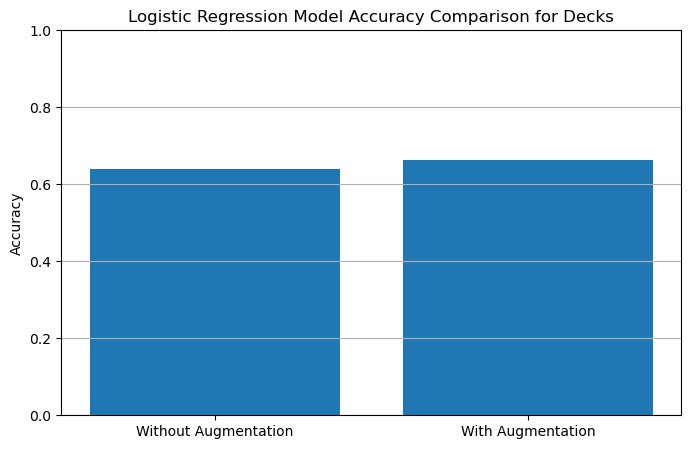

In [138]:
# Example accuracy values
accuracy_without_aug = 0.6387665198237885  # (without augmentation)
accuracy_with_aug = 0.6637298091042585  # (after using augmented dataset)

# Labels and values
labels = ['Without Augmentation', 'With Augmentation']
accuracies = [accuracy_without_aug, accuracy_with_aug]

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, accuracies)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Logistic Regression Model Accuracy Comparison for Decks')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


## Comparison Plot for Accuracy Before Augmentation VS. After Augmentation (Pavements)


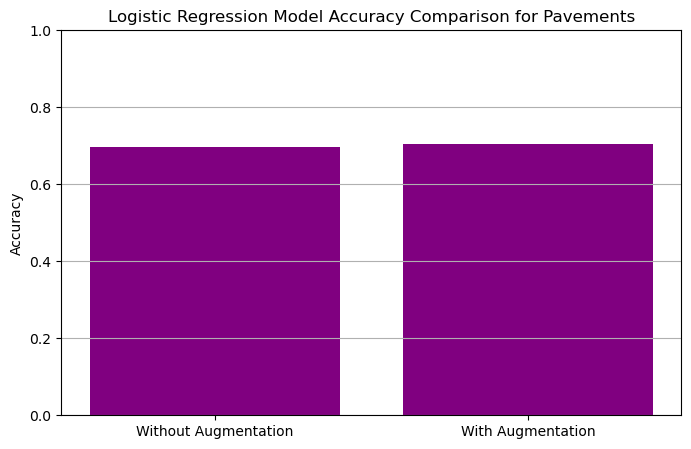

In [137]:
accuracy_without_aug = 0.6961167043353195  # (e.g., without augmentation)
accuracy_with_aug = 0.7057735771522499 # (e.g., after using augmented dataset)

# Labels and values
labels = ['Without Augmentation', 'With Augmentation']
accuracies = [accuracy_without_aug, accuracy_with_aug]

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, accuracies, color='purple')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Logistic Regression Model Accuracy Comparison for Pavements')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


## Comparison Plot for Accuracy Before Augmentation VS. After Augmentation (Walls)

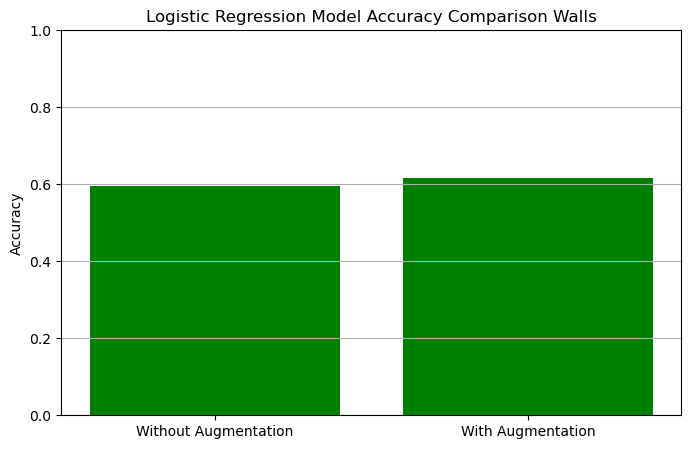

In [136]:
accuracy_without_aug = 0.5967475192943771  # (without augmentation)
accuracy_with_aug = 0.6157662624035282   # (after using augmented dataset)

# Labels and values
labels = ['Without Augmentation', 'With Augmentation']
accuracies = [accuracy_without_aug, accuracy_with_aug]

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, accuracies, color='green')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Logistic Regression Model Accuracy Comparison Walls')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


## Ridge Regression

### Comparison Plot for Accuracy Before and After Ridge for Decks

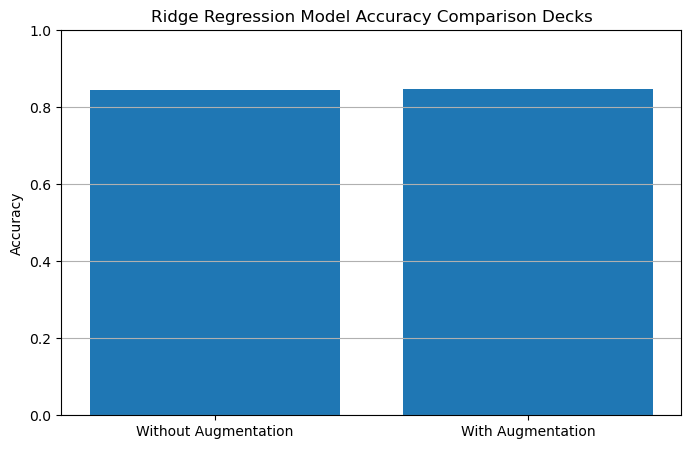

In [4]:
import matplotlib.pyplot as plt 
accuracy_without_aug = 0.8439794419970631  # (without augmentation)
accuracy_with_aug = 0.8469162995594713  # (after using augmented dataset)

# Labels and values
labels = ['Without Augmentation', 'With Augmentation']
accuracies = [accuracy_without_aug, accuracy_with_aug]

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, accuracies)
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Ridge Regression Model Accuracy Comparison Decks')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


### Comparison Plot for Accuracy Before and After Ridge for Pavements

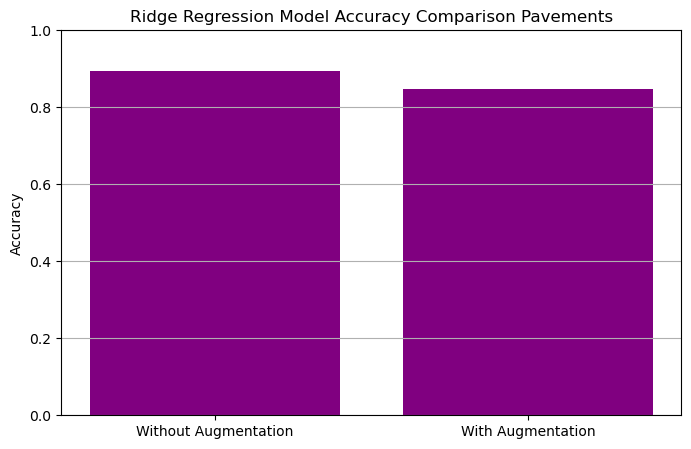

In [6]:
accuracy_without_aug =0.894390795151017  # (without augmentation)
accuracy_with_aug = 0.8469162995594713  # (after using augmented dataset)

# Labels and values
labels = ['Without Augmentation', 'With Augmentation']
accuracies = [accuracy_without_aug, accuracy_with_aug]

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, accuracies, color='purple')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Ridge Regression Model Accuracy Comparison Pavements')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


### Comparison Plot for Accuracy Before and After Ridge for Walls

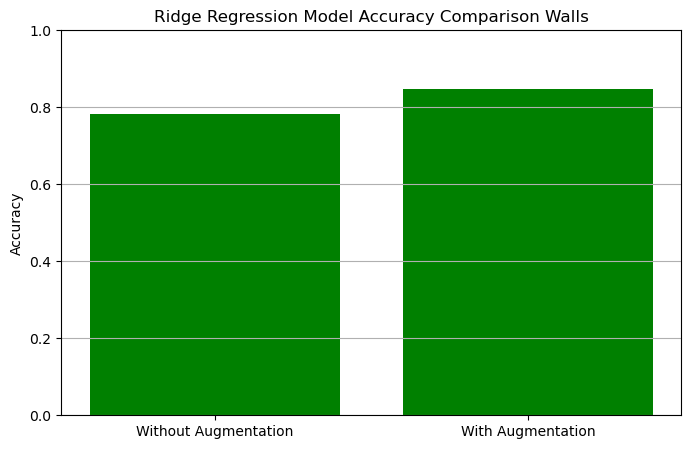

In [7]:
accuracy_without_aug = 0.7830760749724366  # (without augmentation)
accuracy_with_aug =0.8469162995594713  # (after using augmented dataset)

# Labels and values
labels = ['Without Augmentation', 'With Augmentation']
accuracies = [accuracy_without_aug, accuracy_with_aug]

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, accuracies, color='green')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Ridge Regression Model Accuracy Comparison Walls')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()


## CNN Classification 

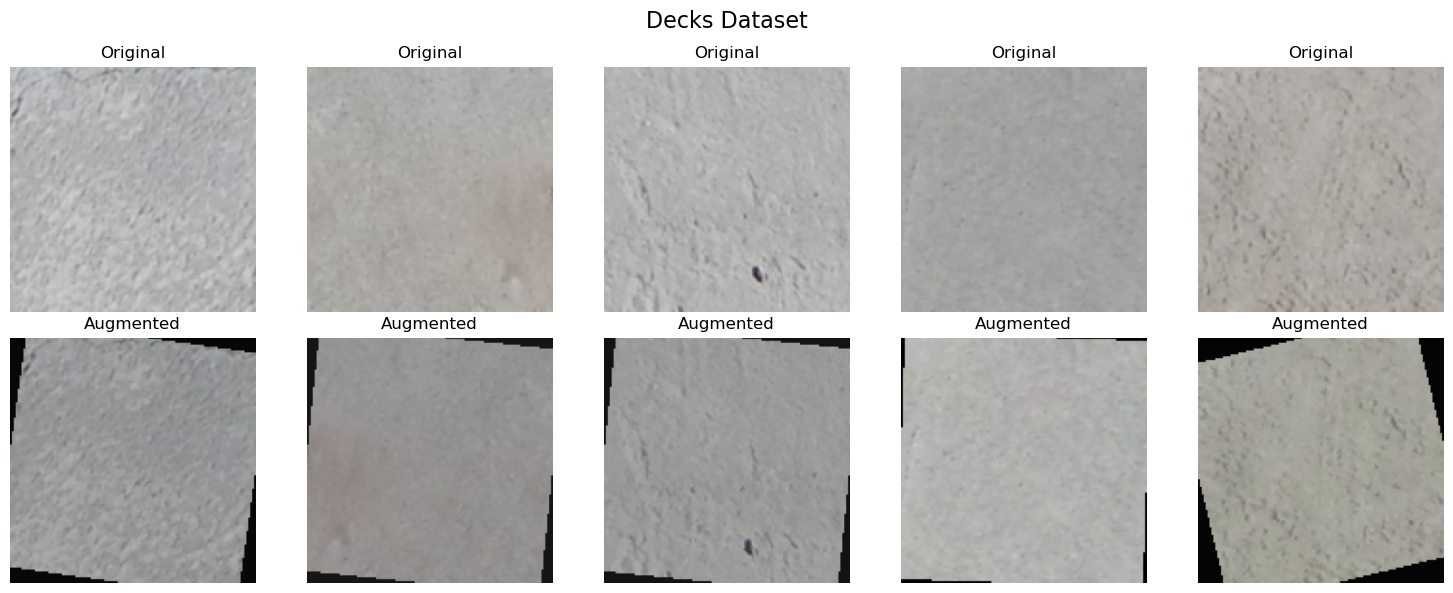

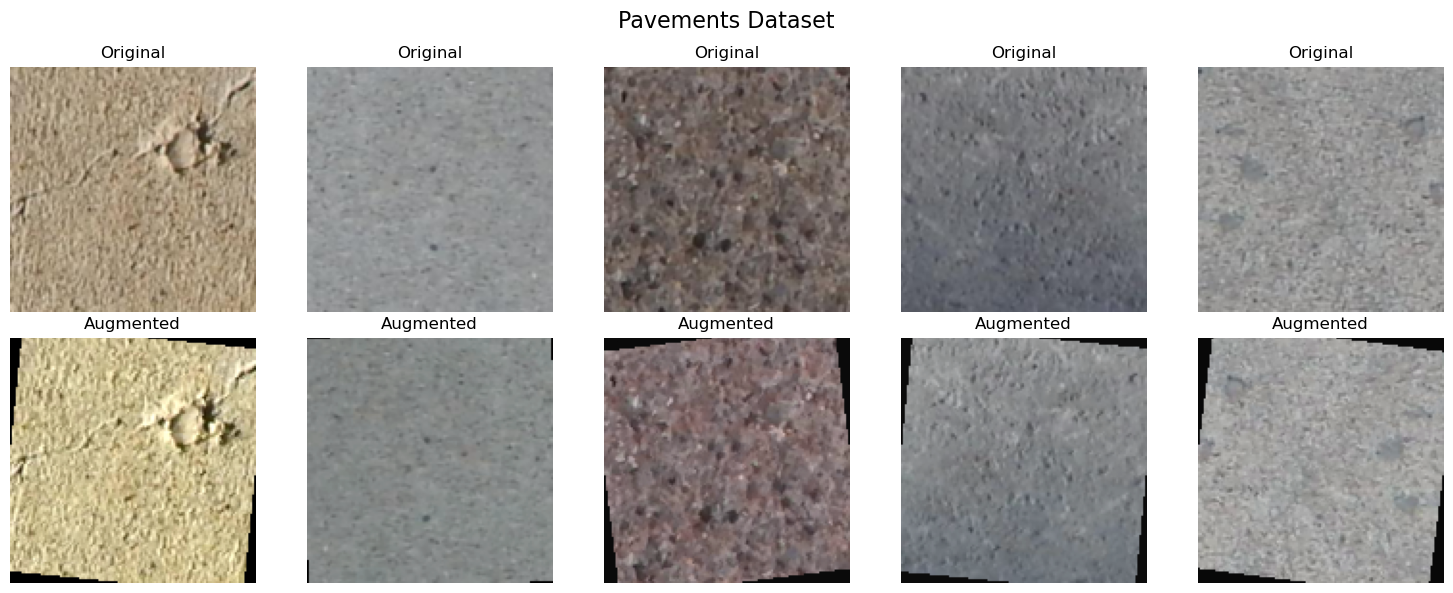

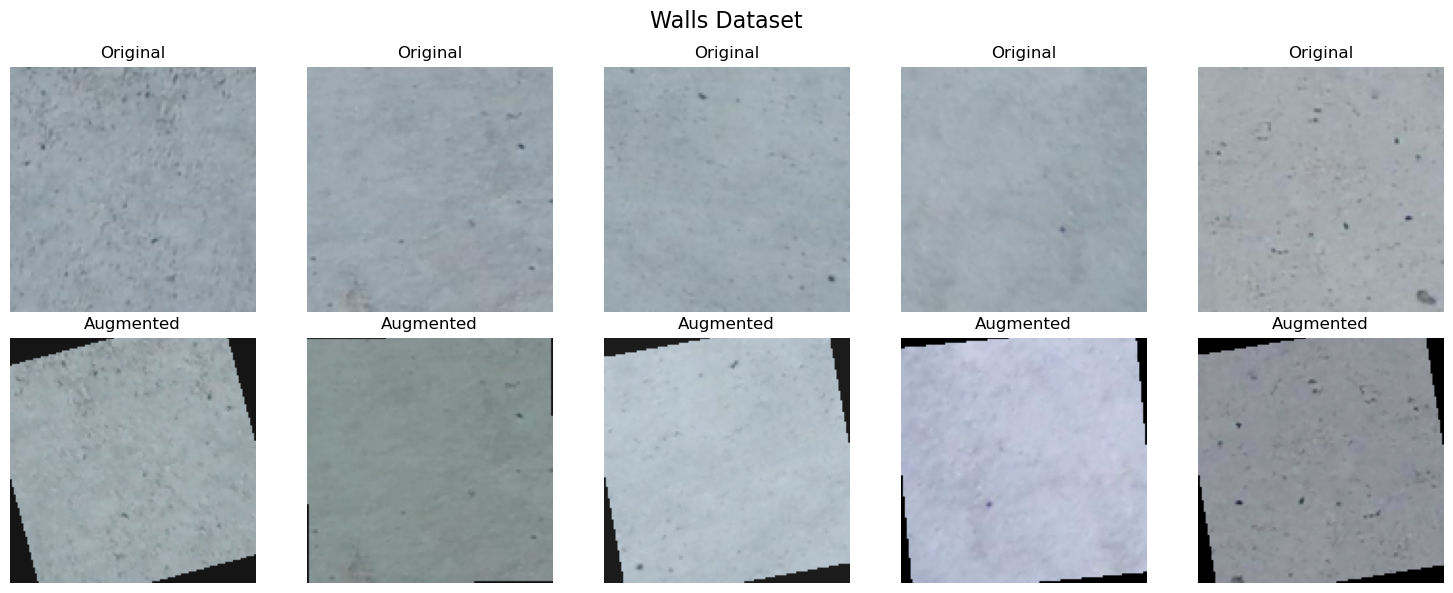

In [49]:
# Visualize images
def visualize_images_by_folder(folder_name, transform, title, num_images=5):
    dataset = datasets.ImageFolder(folder_name, transform=no_aug_transforms)
    images, _ = zip(*[dataset[i] for i in random.sample(range(len(dataset)), num_images)])

    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)

    for i in range(num_images):
        # Original
        axes[0, i].imshow(images[i].permute(1, 2, 0))
        axes[0, i].axis('off')
        axes[0, i].set_title("Original")

        # Augmented
        augmented = train_transforms(transforms.ToPILImage()(images[i]))
        axes[1, i].imshow(augmented.permute(1, 2, 0))
        axes[1, i].axis('off')
        axes[1, i].set_title("Augmented")

    plt.tight_layout()
    plt.show()

# Call function for each dataset
visualize_images_by_folder("C:/Users/Taarini/Downloads/Decks", train_transforms, "Decks Dataset")
visualize_images_by_folder("C:/Users/Taarini/Downloads/Pavements", train_transforms, "Pavements Dataset")
visualize_images_by_folder("C:/Users/Taarini/Downloads/Walls", train_transforms, "Walls Dataset")

In [50]:
def train_model(model, train_loader, val_loader, optimizer, dataset_name):
    model.train()
    for epoch in range(3):  # Keep epochs small for testing
        running_loss = 0.0
        # Training loop
        for images, labels in train_loader:  # Using the train_loader (subset of data)
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation loop
        model.eval()  # Set model to evaluation mode
        correct = 0
        total = 0
        with torch.no_grad():  # No gradient computation needed for validation
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total  # Calculate validation accuracy

        # Print training loss and validation accuracy for this epoch
        print(f"[{dataset_name}] Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Train models for augmented data
train_model(model_decks, train_loader, val_loader, optimizer_decks, "Decks")
train_model(model_pavements, train_loader, val_loader, optimizer_pavements, "Pavements")
train_model(model_walls, train_loader, val_loader, optimizer_walls, "Walls")

# If you also want to train models using non-augmented data, use the no-augmented DataLoaders
train_model(model_decks, no_aug_train_loader, no_aug_val_loader, optimizer_decks, "Decks (No Augmentation)")
train_model(model_pavements, no_aug_train_loader, no_aug_val_loader, optimizer_pavements, "Pavements (No Augmentation)")
train_model(model_walls, no_aug_train_loader, no_aug_val_loader, optimizer_walls, "Walls (No Augmentation)")


[Decks] Epoch 1, Loss: 0.6017, Validation Accuracy: 73.33%
[Decks] Epoch 2, Loss: 0.4944, Validation Accuracy: 73.33%
[Decks] Epoch 3, Loss: 0.4756, Validation Accuracy: 73.33%
[Pavements] Epoch 1, Loss: 0.6564, Validation Accuracy: 73.33%
[Pavements] Epoch 2, Loss: 0.4639, Validation Accuracy: 73.33%
[Pavements] Epoch 3, Loss: 0.4986, Validation Accuracy: 73.33%
[Walls] Epoch 1, Loss: 0.5961, Validation Accuracy: 73.33%
[Walls] Epoch 2, Loss: 0.5199, Validation Accuracy: 73.33%
[Walls] Epoch 3, Loss: 0.4858, Validation Accuracy: 73.33%
[Decks (No Augmentation)] Epoch 1, Loss: 0.4723, Validation Accuracy: 86.67%
[Decks (No Augmentation)] Epoch 2, Loss: 0.4384, Validation Accuracy: 86.67%
[Decks (No Augmentation)] Epoch 3, Loss: 0.4425, Validation Accuracy: 86.67%
[Pavements (No Augmentation)] Epoch 1, Loss: 0.4327, Validation Accuracy: 86.67%
[Pavements (No Augmentation)] Epoch 2, Loss: 0.4836, Validation Accuracy: 86.67%
[Pavements (No Augmentation)] Epoch 3, Loss: 0.4320, Validation 

### LightGBM Classifier

results before and after augmentation for each type as follows:

- Decks 
 - Before: 0.7309104258443465
 - After: 0.7268722466960352 
- Pavements
 - Before:  0.8532977193342922
 - After:  0.8272036161906718

- Walls
 - Before: 0.6915656008820287
 - After: 0.6728224917309813

## Discussion and Conclusion 


## For Regression

In conclusion, we can observe that the logistic regression model does not provide a great increase in accuracy or precision in claissification report for crack detection even after tuning the hyperparameters and addtional improvement using K-fold CV. There is however, a slight increase in accuracy with augmentation when compared unagumented data. 

The model also shows more bias towards non-cracked in terms of precision and recall which may becuase there are more non-cracked images in each case than cracked which is makes the model more sensitive to bias. 

Thus, for further discussion/ scope it is safe to say that the logreg model may not be the ideal model for such a robust and non-linear dataset as it is sensitive to bias and cannot detect local patterns easily. Perhaps a non-linear classification model may be the right approach for this. 

In terms of comaprison with Ridge regression, the model overall performs better and faster with the dataset for both before and after augmentation cases with higher accuracies for each type of concrete generated. However, if we were to go through each case-by-case then turns out that ridge regression performs a little better for decks and walls but less the case of pavements after augementation. A possible reason behind this could be the size of the pavements dataset which likely to have caused more variance after augmentation. Thus, ridge regression performs better than logistic in general. However, further scrutiny or comparison can be done using other regression models. Also, improvements using K-fold did not improve the accuracy significantly.  

## For Classification

The results indicate that image augmentation did not significantly enhance model performance in this case. For the augmented dataset, all three models (Decks, Pavements, and Walls) showed a consistent validation accuracy of 73.33% across all epochs, with only a slight decline in loss. In contrast, the non-augmented dataset yielded higher validation accuracy—86.67% across all models—suggesting that augmentation offered no clear advantage for crack detection in this scenario. One likely reason is the relatively small dataset size (200 samples), which may have limited the impact of augmentation. Additionally, the chosen techniques—rotation, flipping, and brightness adjustments—may not have been ideal for this dataset. Overfitting may also explain the high validation accuracy on the non-augmented models, indicating poor generalization to unseen data.

In future iterations, I would consider testing alternative augmentation methods or expanding the dataset to assess potential gains in performance. Incorporating regularization techniques such as dropout, or using a more complex model architecture, could also support better generalization. Quantitatively, validation accuracy improved by 13.34% (from 73.33% with augmentation to 86.67% without), underscoring the need to reevaluate the effectiveness of augmentation and adapt the training approach accordingly.

The LightGBM classifier on the other hand definitely worked faster than the CNN model, however, the results definitely aligned with the ones that were generated from the CNN model as in all cases the accuracy decreased after augmentation. However, interestingly the accuracy for after augmentation model increased when K-fold is used for improvement, which simply may suggest that k-fold improvements may have resulted in biased recall for non-cracked images due to overfitting resulting in increased accuracy score. Overall CNN is considered to be a more reliable and far superior model when it comes to raw image-based tasks like crack detection, as they automatically learn spatial hierarchies and patterns—something boosting algorithms can’t do. Further comparisons can be made using different models to find the best fit and trend for crack detection in terms of augmentation. 



## References

### For Regression Task

Waheed, Ahmed. "HOG Feature Extraction in Python." The Python Code, thepythoncode.com/article/hog-feature-extraction-in-python. Accessed 25 Apr. 2025.

Dalal, Navneet, and Bill Triggs. "Histograms of Oriented Gradients for Human Detection." Proceedings of the IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR), 2005, vol. 1, pp. 886–893. IEEE.

Biecek, Przemysław, and Jakub Czakon. "Data Augmentation in Python: Everything You Need to Know." Neptune AI, 18 Nov. 2021, https://neptune.ai/blog/data-augmentation-in-python. Accessed 25 Apr. 2025.

Perez, Luis, and Jason Wang. "The Effectiveness of Data Augmentation in Image Classification Using Deep Learning." arXiv preprint arXiv:1712.04621 (2017).


van der Walt, Stéfan, Johannes L. Schönberger, Juan Nunez-Iglesias, et al. "Scikit-image: Image Processing in Python." PeerJ, vol. 2, 2014, p. e453.

Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning. 3rd ed., Packt Publishing, 2019.

Pedregosa, Fabian, et al. “Scikit-Learn: Machine Learning in Python.” Journal of Machine Learning Research, vol. 12, 2011, pp. 2825–2830.

### For Classification Task

Adam.” Adam - PyTorch 2.7 Documentation, pytorch.org/docs/stable/generated/torch.optim.Adam.html. Accessed 26 Apr. 2025.
“Crossentropyloss.” CrossEntropyLoss - PyTorch 2.7 Documentation
pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html. Accessed 26 Apr. 2025.


Hamdan, Mohammed, et al. “What I Missing Here, Using ImageFolder to Get the Full Folder Name as Labels for MNIST-Double Dataset Images?” Stack Overflow, 1 Feb. 2022, stackoverflow.com/questions/67398465/what-i-missing-here-using-imagefolder-to-get-the-full-folder-name-as-labels-for.


Kumar, Aditya. “What Is Epoch in Machine Learning?: Simplilearn.” Simplilearn.Com, Simplilearn, 2 Apr. 2025, www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning.


Saewon_Yang. “Transform Resize Not Working.” PyTorch Forums, 31 Jan. 2019, discuss.pytorch.org/t/transform-resize-not-working/36057.


“Torch.Nn.” Torch.Nn - PyTorch 2.7 Documentation, pytorch.org/docs/stable/nn.html. Accessed 26 Apr. 2025.
“Torch.Utils.Data.” Torch.Utils.Data - PyTorch 2.7 Documentation, pytorch.org/docs/stable/data.html. Accessed 26 Apr. 2025.

Microsoft. LightGBM Documentation. Microsoft, 2023.

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2nd ed., O’Reilly Media, 2019.